# Seasonal anomalies from a 30-year baseline climatology

Seasonal departure from climatology of a given time window

Jiwoo Lee (LLNL), 2023-1-23

In [1]:
import xcdat as xc
import matplotlib.pyplot as plt

## Load input data

In [2]:
# input file (monthly sea surface temperature) downloaded from MetOffice (https://www.metoffice.gov.uk/hadobs/hadisst/data/HadISST_sst.nc.gz)
infile = "/Users/lee1043/Documents/Research/DATA/HadISST/HadISST_sst.nc"  

In [3]:
ds = xc.open_dataset(infile)  # climatology of subsetted data (time: 1810, latitude: 180, longitude: 360)

In [4]:
ds

<xarray.Dataset>
Dimensions:         (time: 1810, bnds: 2, latitude: 180, longitude: 360)
Coordinates:
  * time            (time) object 1870-01-16 11:59:59.505615 ... 2020-10-16 1...
  * latitude        (latitude) float32 89.5 88.5 87.5 86.5 ... -87.5 -88.5 -89.5
  * longitude       (longitude) float32 -179.5 -178.5 -177.5 ... 178.5 179.5
Dimensions without coordinates: bnds
Data variables:
    time_bnds       (time, bnds) object 1870-01-01 17:59:59.588012 ... 2020-1...
    sst             (time, latitude, longitude) float32 ...
    longitude_bnds  (longitude, bnds) float32 -180.0 -179.0 ... 179.0 180.0
    latitude_bnds   (latitude, bnds) float32 90.0 89.0 89.0 ... -89.0 -90.0
Attributes:
    Title:                      Monthly version of HadISST sea surface temper...
    description:                HadISST 1.1 monthly average sea surface tempe...
    institution:                Met Office Hadley Centre
    source:                     HadISST
    reference:                  Rayner, N. A., Parker, D. E., Horton, E. B., ...
    Conventions:                CF-1.0
    history:                    10/12/2020 converted to netcdf from pp format
    supplementary_information:  Updates and supplementary information will be...
    comment:                    Data restrictions: for academic research use ...

In [5]:
data_var = 'sst'  #  name of data variable

In [6]:
ds[data_var] = ds[data_var].where(ds[data_var] >= -0.5)  # exclude missing value

## Temporal subset of original dataset to get reference climatology from the baseline time window

In [7]:
ds_reference = ds.sel(time=slice("1971-01-01", "2000-12-31"))  # time subsetted data

In [8]:
ds_clim = ds_reference.temporal.average(data_var)  # overall climatology of subsetted data

## Anomaly calculation

* Get departure by subtracting the climatology (1 time point), `ds_clim`, from the original time series, `ds`.

In [9]:
ds[data_var+'_departure'] = ds[data_var] - ds_clim[data_var]  # add anomaly data varialbe to the original dataset

## Check result

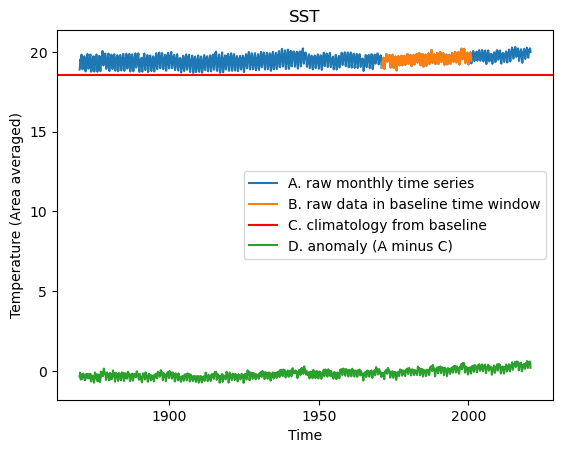

In [10]:
# plot

# original dataset
ds.spatial.average(data_var)[data_var].plot.line(label='A. raw monthly time series')

# subsetted for reference period 
ds_reference.spatial.average(data_var)[data_var].plot.line(label='B. raw data in baseline time window')

# average
plt.axhline(y=float(ds_clim.spatial.average(data_var)[data_var]), 
            color='r', 
            linestyle='-', 
            label='C. climatology from baseline')

# departure
ds.spatial.average(data_var+'_departure')[data_var+'_departure'].plot.line(label='D. anomaly (A minus C)')

plt.ylabel('Temperature (Area averaged)')
plt.title('SST')
plt.legend()
plt.savefig('plot1.png')